# Transforming Time Series Data

**In this lecture you will learn how to:**

* Apply a log transform to a time series in order to make it easier to forecast.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Recap: Calender Adjustments

We have already met one type of transformation: **the calender adjustment**

We did this in order to remove some of the noise from the time series, due different number of days in in each month.  Removing this noise makes it an easier forecasting problem.

In [2]:
sales = pd.read_csv('data/Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
sales.index.freq = 'MS'

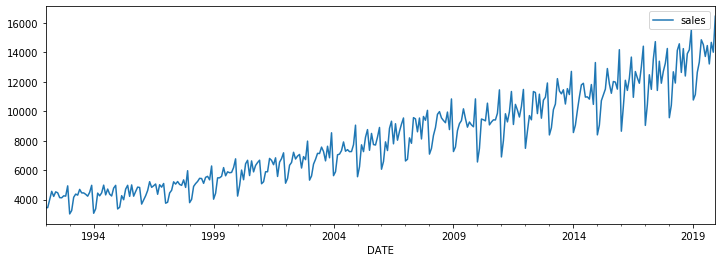

In [3]:
sales.plot(figsize=(12,4))

In [4]:
sales.index.days_in_month

Int64Index([31, 29, 31, 30, 31, 30, 31, 31, 30, 31,
            ...
            31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
           dtype='int64', name='DATE', length=336)

In [5]:
sales_rate = sales['sales'] / sales.index.days_in_month

In [6]:
sales_rate.head(5)

DATE
1992-01-01    111.580645
1992-02-01    119.241379
1992-03-01    129.096774
1992-04-01    152.133333
1992-05-01    136.161290
Freq: MS, dtype: float64

### Backtransforming a calender adjustment

After you have produced a forecast on the transformed data you are likely to need to back-transform to its original units.  This is straightforward for calender adjustments.  Just reverse the operation.

In [7]:
sales_rate * sales_rate.index.days_in_month

DATE
1992-01-01     3459.0
1992-02-01     3458.0
1992-03-01     4002.0
1992-04-01     4564.0
1992-05-01     4221.0
               ...   
2019-08-01    14464.0
2019-09-01    13215.0
2019-10-01    14680.0
2019-11-01    14014.0
2019-12-01    16455.0
Freq: MS, Length: 336, dtype: float64

## Dealing with increasing variance.

One property of seasonal time series with trend is that the seasonal peaks and troughs increase with the level of the series. This property can negatively impact the accuracy of forecasts.  An example of increasing variance is illustrated by the Alcohol Sales data below.  The orange line is a 12 month moving average.  You can see that as the level increases the fluctuations either side of the mean increase.

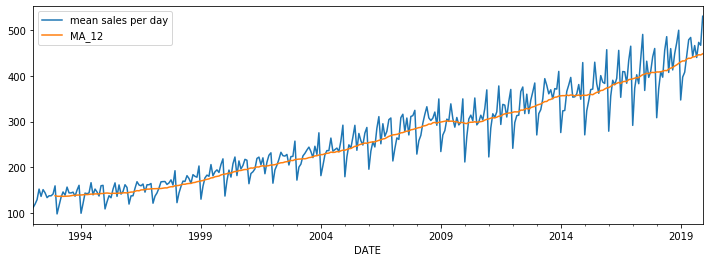

In [8]:
ma = sales_rate.rolling(window=12).mean()
ax = sales_rate.plot(figsize=(12,4), label='mean sales per day')
ma.plot(ax=ax, label='MA_12')
ax.legend()

### Taking the natural logarithm stabilises variance 

In [9]:
log_sales = np.log(sales_rate)

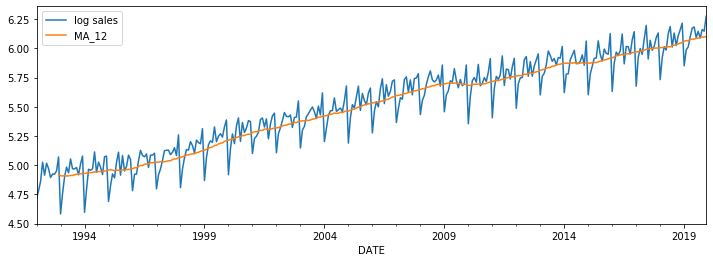

In [10]:
ma = log_sales.rolling(window=12).mean()
ax = log_sales.plot(figsize=(12,4), label='log sales')
ma.plot(ax=ax, label='MA_12')
ax.legend()

#### Backtransforming logged data

This is straightforward with `NumPy`.  We simply need to exponentiate the data using the function `np.exp()`

In [11]:
np.exp(log_sales)

DATE
1992-01-01    111.580645
1992-02-01    119.241379
1992-03-01    129.096774
1992-04-01    152.133333
1992-05-01    136.161290
                 ...    
2019-08-01    466.580645
2019-09-01    440.500000
2019-10-01    473.548387
2019-11-01    467.133333
2019-12-01    530.806452
Freq: MS, Length: 336, dtype: float64

### Power Transformations

As an alterantive to taking the logarithm of the data is to take the cube root or square root.

In [12]:
cbrt_sales = np.cbrt(sales_rate)

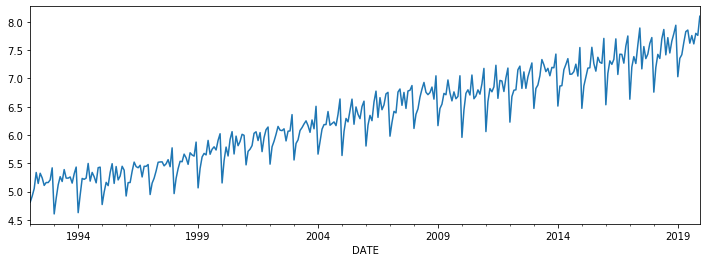

In [13]:
cbrt_sales.plot(figsize=(12,4))

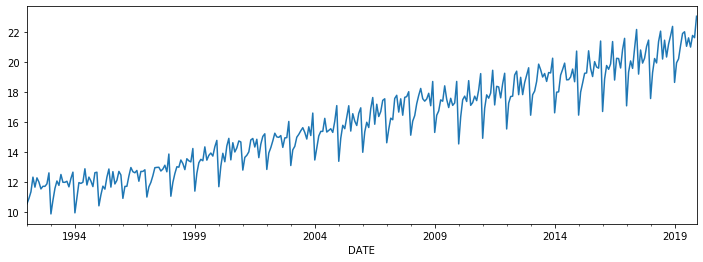

In [14]:
sqrt_sales = np.sqrt(sales_rate)
sqrt_sales.plot(figsize=(12,4))

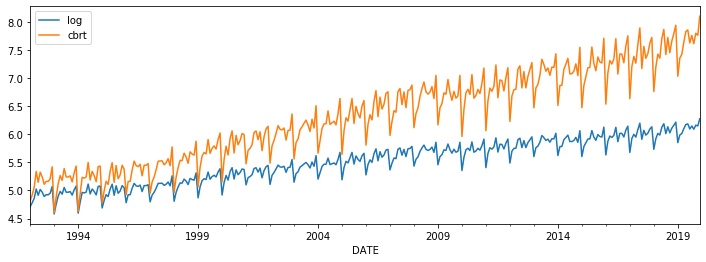

In [15]:
ax = log_sales.plot(figsize=(12,4), label='log')
cbrt_sales.plot(ax=ax, label='cbrt')
ax.legend()